In [1]:
import sys
sys.path.insert(0, '../src')

In [2]:
import json
import pandas as pd
import re
import os
import sys
import pickle
from sklearn.decomposition import PCA

In [3]:
try:
    from get_splits_minimal import get_splits_for_linear_probe
    from eval_linear_probe import train_and_evaluate_logistic_regression_with_val, train_and_evaluate_logistic_regression, train_and_evaluate_logistic_regression_all_metrics
    from utils import bootstrap
    print("Successfully imported package")
except ImportError as e:
    print(f"Error importing package: {e}")

Successfully imported package


In [4]:
(train_X, train_y), (val_X, val_y), (test_X, test_y),split = get_splits_for_linear_probe(
    skl_path = '../data/dpo_data_stratify_erbb2_embeddings_epoch40_lr0.001_beta0.5_20checkpoints.pkl',
    # skl_path='/content/gdrive/MyDrive/Capstone Code/supcon testing/data/pgr_dpo_epoch40_beta0.5_lr1e-4_best_1.pkl',
    csv_path='../data/ERBB2_manifest.csv',
    biomarker='ERBB2'
)

Loading embeddings from ../data/dpo_data_stratify_erbb2_embeddings_epoch40_lr0.001_beta0.5_20checkpoints.pkl
Loaded 1127 slide embeddings
Embedding dimension: (768,)

Normalizing embeddings...
âœ“ Normalized 1127 embeddings
Loading clinical data from ../data/ERBB2_manifest.csv
Loaded 691 samples

SIMPLE RANDOM SLIDE-LEVEL SPLITTING
Split ratios: Train ~50%, Val ~25%, Test 25%

TRAIN:
  Slides: 344 (49.9%)
  Patients: 329
  Distribution: {'negative': 271, 'positive': 73}

VAL:
  Slides: 173 (25.1%)
  Patients: 168
  Distribution: {'negative': 137, 'positive': 36}

TEST:
  Slides: 173 (25.1%)
  Patients: 171
  Distribution: {'negative': 136, 'positive': 37}
  Converting string labels to binary...
ERBB2 distribution: {'negative': 271, 'positive': 73}
Total slides: 344
  Converting string labels to binary...
ERBB2 distribution: {'negative': 137, 'positive': 36}
Total slides: 173
  Converting string labels to binary...
ERBB2 distribution: {'negative': 136, 'positive': 37}
Total slides: 173


In [5]:
# pca = PCA(n_components=50, random_state=42)  
# train_X_pca = pca.fit_transform(train_X)
# val_X_pca = pca.transform(val_X)
# test_X_pca = pca.transform(test_X)

Finding best C: 100%|██████████| 45/45 [00:00<00:00, 54.10it/s]


Best C: 0.5623413251903491

METRICS COMPARISON
Metric          |        Train |          Val |         Test
----------------------------------------------------------------------
/acc            |       0.7849 |       0.7110 |       0.6879
/bacc           |       0.8034 |       0.6332 |       0.6342
/kappa          |       0.4854 |       0.2330 |       0.2243
/nw_kappa       |       0.4854 |       0.2330 |       0.2243
/weighted_f1    |       0.8014 |       0.7267 |       0.7087
/loss           |       0.4883 |       0.5835 |       0.6226
/auroc          |       0.8645 |       0.6642 |       0.6524
/auprc          |       0.6282 |       0.3459 |       0.3315


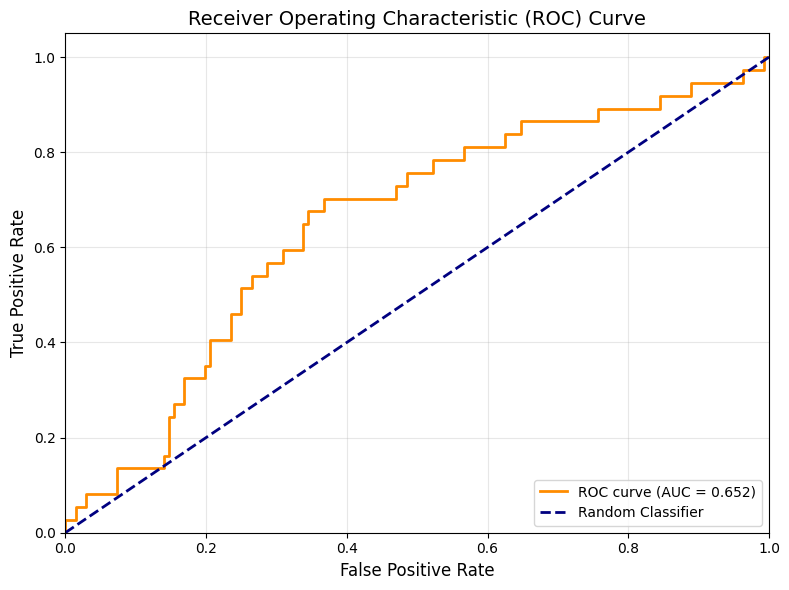

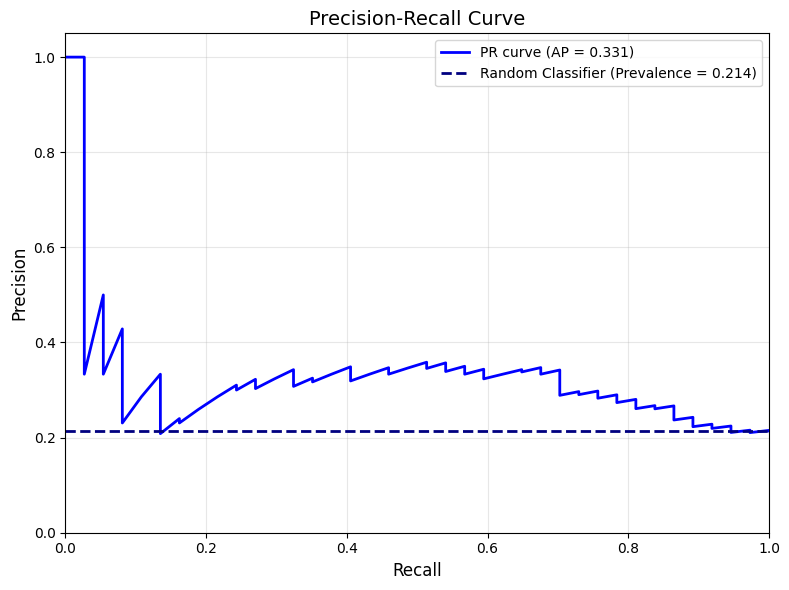

In [6]:
import numpy as np
log_spaced_values = np.logspace(np.log10(10e-6), np.log10(10e5), num=45)
outputs = train_and_evaluate_logistic_regression_all_metrics(
    train_data=train_X,
    train_labels=train_y,
    val_data=val_X,
    val_labels=val_y,
    test_data=test_X,
    test_labels=test_y,
     log_spaced_values=log_spaced_values
)

In [7]:
bootstrap_kwargs = {'n': 1000, 'alpha': 0.95}
results_mean, results_std = bootstrap(results_dict=outputs, **bootstrap_kwargs)  # takes a while as 46 imbalanced classes are bootstrapped
for keys, values in results_mean.items():
    print(f"{keys.split('/')[-1]: <12}: {values:.4f} ± {results_std[keys]:.4f}")

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:08<00:00, 112.19it/s]

acc         : 0.7744 ± 0.0303
bacc        : 0.5220 ± 0.0232
kappa       : 0.0607 ± 0.0634
nw_kappa    : 0.0607 ± 0.0634
weighted_f1 : 0.7126 ± 0.0402
loss        : 0.5141 ± 0.0501
auroc       : 0.6545 ± 0.0502
auprc       : 0.3764 ± 0.0683


In [8]:
ERBB2_manifest = pd.read_csv('../data/ERBB2_manifest.csv')
ERBB2_manifest

,slide_id,submitter_id,project_id,sex,OncoTreeCode,OncoTreeSiteCode,site,source_site,ERBB2
0,TCGA-GM-A2DI-01Z-00-DX1.5E9715EA-9D2B-49D0-8F1...,TCGA-GM-A2DI,TCGA-BRCA,F,IDC,BREAST,GM,University of Texas MD Anderson Cancer Center,negative
1,TCGA-E2-A152-01Z-00-DX1.B0860DEB-D34B-4C5D-97F...,TCGA-E2-A152,TCGA-BRCA,F,IDC,BREAST,E2,Roswell Park,positive
2,TCGA-BH-A0DS-01Z-00-DX1.38E82A1F-21B9-4B97-A30...,TCGA-BH-A0DS,TCGA-BRCA,F,IDC,BREAST,BH,University of Pittsburgh,negative
3,TCGA-BH-A0BP-01Z-00-DX1.63A87C1D-87FA-494D-983...,TCGA-BH-A0BP,TCGA-BRCA,F,IDC,BREAST,BH,University of Pittsburgh,negative
4,TCGA-A2-A1FW-01Z-00-DX1.DC2BC5D7-E57B-444E-833...,TCGA-A2-A1FW,TCGA-BRCA,F,IDC,BREAST,A2,Walter Reed,negative
...,...,...,...,...,...,...,...,...,...
686,TCGA-A7-A0DB-01Z-00-DX1.9CE855BC-0C37-43FB-880...,TCGA-A7-A0DB,TCGA-BRCA,F,IDC,BREAST,A7,Christiana Healthcare,negative
687,TCGA-A7-A6VX-01Z-00-DX2.9EE94B59-6A2C-4507-AA4...,TCGA-A7-A6VX,TCGA-BRCA,F,IDC,BREAST,A7,Christiana Healthcare,negative
688,TCGA-3C-AALI-01Z-00-DX1.F6E9A5DF-D8FB-45CF-B4B...,TCGA-3C-AALI,TCGA-BRCA,F,IDC,BREAST,3C,Columbia University,positive
689,TCGA-3C-AALK-01Z-00-DX1.4E6EB156-BB19-410F-878...,TCGA-3C-AALK,TCGA-BRCA,F,IDC,BREAST,3C,Columbia University,positive


In [9]:
slide_feature_path = "../data/embeddings_df.pkl"
with open(slide_feature_path, 'rb') as file:
  data = pickle.load(file)
embeddings_df = pd.DataFrame({'slide_id': data['slide_id'], 'embeddings': list(data['embeddings'][:])})

In [10]:
ERBB2_df = pd.merge(embeddings_df, ERBB2_manifest, on='slide_id')

In [11]:
ERBB2_df


,slide_id,embeddings,submitter_id,project_id,sex,OncoTreeCode,OncoTreeSiteCode,site,source_site,ERBB2
0,TCGA-BH-A0DO-01Z-00-DX1.1684557E-A5D4-4828-B2D...,"[0.73828125, -0.29882812, -0.42456055, 0.07226...",TCGA-BH-A0DO,TCGA-BRCA,F,IDC,BREAST,BH,University of Pittsburgh,negative
1,TCGA-BH-A0DP-01Z-00-DX1.5550557D-4E5B-4B57-8C1...,"[0.7866211, -0.8105469, -0.18664551, -0.055938...",TCGA-BH-A0DP,TCGA-BRCA,F,ILC,BREAST,BH,University of Pittsburgh,negative
2,TCGA-BH-A0DT-01Z-00-DX1.73AFCEBB-06B1-4870-ADA...,"[0.43139648, 0.040008545, -0.048095703, 0.0200...",TCGA-BH-A0DT,TCGA-BRCA,F,IDC,BREAST,BH,University of Pittsburgh,negative
3,TCGA-BH-A0DS-01Z-00-DX1.38E82A1F-21B9-4B97-A30...,"[0.55126953, -0.17980957, -0.21716309, -0.0365...",TCGA-BH-A0DS,TCGA-BRCA,F,IDC,BREAST,BH,University of Pittsburgh,negative
4,TCGA-BH-A0DQ-01Z-00-DX1.5A98747C-52D9-45AD-BC8...,"[0.68896484, -0.31420898, -0.38427734, -0.0858...",TCGA-BH-A0DQ,TCGA-BRCA,F,IDC,BREAST,BH,University of Pittsburgh,negative
...,...,...,...,...,...,...,...,...,...,...
686,TCGA-PE-A5DE-01Z-00-DX1.88B354F2-5485-44AA-A05...,"[0.6015625, -0.5566406, -0.25512695, 0.4067382...",TCGA-PE-A5DE,TCGA-BRCA,F,ILC,BREAST,PE,Fox Chase,negative
687,TCGA-PE-A5DD-01Z-00-DX1.E1EF11EC-B87B-49DE-A54...,"[0.87939453, -0.9394531, -0.37402344, 0.419677...",TCGA-PE-A5DD,TCGA-BRCA,F,ILC,BREAST,PE,Fox Chase,positive
688,TCGA-3C-AALI-01Z-00-DX1.F6E9A5DF-D8FB-45CF-B4B...,"[1.1025391, 0.24084473, -0.27319336, 0.1853027...",TCGA-3C-AALI,TCGA-BRCA,F,IDC,BREAST,3C,Columbia University,positive
689,TCGA-3C-AALK-01Z-00-DX1.4E6EB156-BB19-410F-878...,"[0.74316406, 0.44628906, -0.24963379, -0.08148...",TCGA-3C-AALK,TCGA-BRCA,F,IDC,BREAST,3C,Columbia University,positive


In [12]:
import numpy as np
log_spaced_values = np.logspace(np.log10(10e-6), np.log10(10e5), num=45)
results, outputs = train_and_evaluate_logistic_regression(train_X, train_y, val_X, val_y, log_spaced_values=log_spaced_values)

Finding best C via CV: 100%|██████████| 45/45 [00:03<00:00, 13.93it/s]

Best C: 0.1 (CV score: -0.4594)


In [13]:
results

{'/acc': 0.791907514450867,
 '/bacc': 0.5921532846715328,
 '/kappa': 0.22595078299776294,
 '/nw_kappa': 0.22595078299776294,
 '/weighted_f1': 0.7636392430121149,
 '/loss': 0.44853790239184177,
 '/auroc': 0.7491889699918897,
 '/auprc': 0.4655691443217355}

In [14]:
outputs = pd.DataFrame(outputs)

In [15]:
outputs['Predicts'] = outputs['targets'] == outputs['preds']
outputs

,targets,preds,probs,Predicts
0,0,0,0.044573,True
1,0,0,0.036230,True
2,0,0,0.069467,True
3,1,0,0.359272,False
4,0,0,0.277699,True
...,...,...,...,...
168,0,0,0.094854,True
169,0,0,0.055249,True
170,1,1,0.593925,True
171,1,1,0.768228,True


In [17]:
val_df = pd.DataFrame({
    'slide_id': split["val"]
})


ERBB2_val = ERBB2_df[ERBB2_df['slide_id'].isin(split["val"])].copy()


val_df = ERBB2_val.merge(val_df, on='slide_id', how='inner')


In [18]:
validation = val_df.merge(outputs, left_index=True, right_index=True)

In [19]:
validation

,slide_id,embeddings,submitter_id,project_id,sex,OncoTreeCode,OncoTreeSiteCode,site,source_site,ERBB2,targets,preds,probs,Predicts
0,TCGA-BH-A0DT-01Z-00-DX1.73AFCEBB-06B1-4870-ADA...,"[0.43139648, 0.040008545, -0.048095703, 0.0200...",TCGA-BH-A0DT,TCGA-BRCA,F,IDC,BREAST,BH,University of Pittsburgh,negative,0,0,0.044573,True
1,TCGA-AO-A0J7-01Z-00-DX1.DBA7BA24-CEEF-4636-87B...,"[0.29003906, -0.0435791, 0.064697266, 0.329101...",TCGA-AO-A0J7,TCGA-BRCA,F,IDC,BREAST,AO,Memorial Sloan Kettering Cancer Center,negative,0,0,0.036230,True
2,TCGA-AO-A0JB-01Z-00-DX1.250FE098-345B-4981-923...,"[0.6982422, -0.5307617, -0.09173584, 0.0744018...",TCGA-AO-A0JB,TCGA-BRCA,F,IDC,BREAST,AO,Memorial Sloan Kettering Cancer Center,negative,0,0,0.069467,True
3,TCGA-BH-A0E2-01Z-00-DX1.5F6FA19C-D59F-45BE-80C...,"[0.984375, -0.25976562, -0.01977539, 0.0957641...",TCGA-BH-A0E2,TCGA-BRCA,F,IDC,BREAST,BH,University of Pittsburgh,negative,1,0,0.359272,False
4,TCGA-AO-A0JG-01Z-00-DX1.FA785D56-B4FF-4CC3-A63...,"[0.30029297, 0.19250488, 0.03668213, -0.013023...",TCGA-AO-A0JG,TCGA-BRCA,F,IDC,BREAST,AO,Memorial Sloan Kettering Cancer Center,negative,0,0,0.277699,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,TCGA-BH-A0BZ-01Z-00-DX1.45EB3E93-A871-49C6-9EA...,"[0.52441406, -0.17382812, -0.32104492, 0.23327...",TCGA-BH-A0BZ,TCGA-BRCA,F,IDC,BREAST,BH,University of Pittsburgh,negative,0,0,0.094854,True
169,TCGA-BH-A0C7-01Z-00-DX1.C70D358E-C48F-4F69-86C...,"[0.8300781, 0.012168884, -0.2956543, 0.1947021...",TCGA-BH-A0C7,TCGA-BRCA,F,IDC,BREAST,BH,University of Pittsburgh,positive,0,0,0.055249,True
170,TCGA-BH-A0DH-01Z-00-DX1.968AA1FD-068C-4B90-8C9...,"[0.4519043, -0.49072266, -0.42138672, 0.078735...",TCGA-BH-A0DH,TCGA-BRCA,F,IDC,BREAST,BH,University of Pittsburgh,negative,1,1,0.593925,True
171,TCGA-PE-A5DD-01Z-00-DX1.E1EF11EC-B87B-49DE-A54...,"[0.87939453, -0.9394531, -0.37402344, 0.419677...",TCGA-PE-A5DD,TCGA-BRCA,F,ILC,BREAST,PE,Fox Chase,positive,1,1,0.768228,True


In [20]:
# Split the 'embeddings' into 768 separate columns
embedding_validation = pd.DataFrame(validation['embeddings'].tolist(), columns=[f'embedding_{i+1}' for i in range(768)])

# Save the embeddings into a TSV file
embedding_validation.to_csv('../data/ERBB2_validation_embeddings_stratify.tsv', sep='\t', index=False,header=False)

# Create a metadata dataframe with the relevant columns
metadata_validation = validation[['slide_id', 'targets', 'preds', 'Predicts']]

# Save the metadata into a separate TSV file
metadata_validation.to_csv('../data/ERBB2_validation_metadata_stratify.tsv', sep='\t', index=False)